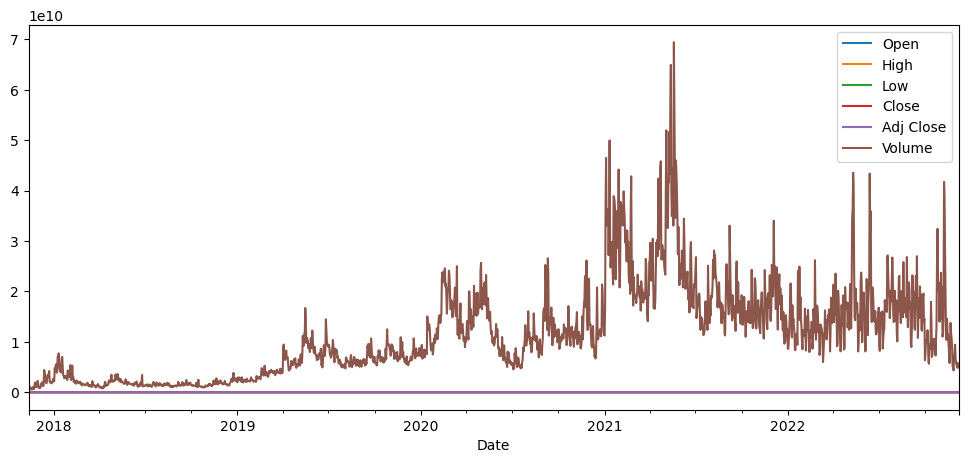

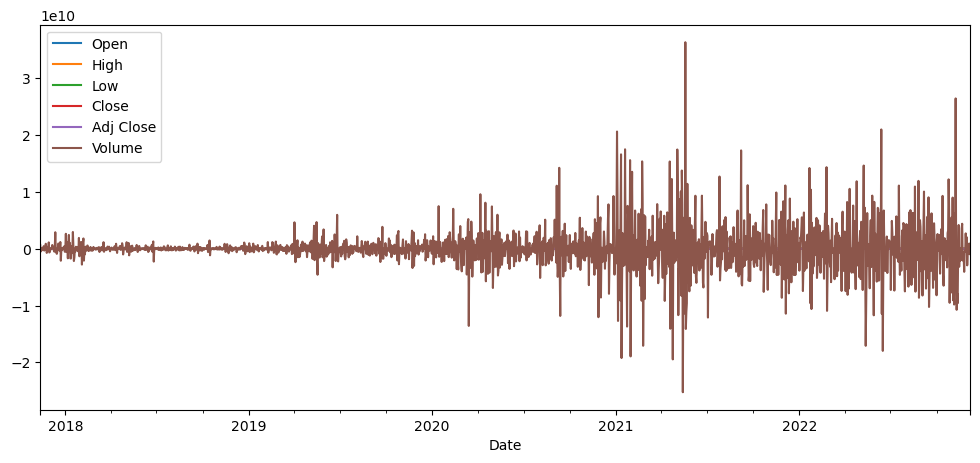

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

# Daten einlesen
df = pd.read_csv('ETH-EUR_11_11_2017-07_12_2022.csv', index_col='Date', parse_dates=True)
df.index.freq = 'D'

# Daten plotten
df.plot(figsize=(12,5))
plt.show()

# Daten auf Stationarität prüfen
adfuller(df['Close'])

# Daten differenzieren
df_diff = df.diff()
df_diff = df_diff.dropna()

# Daten plotten
df_diff.plot(figsize=(12,5))
plt.show()

# Daten auf Stationarität prüfen
# adfuller(df_diff['Close'])

# # ACF und PACF plotten
# plot_acf(df_diff, lags=np.arange(len(df_diff) - 1))
# plot_pacf(df_diff,lags=np.arange(len(df_diff) - 1))
# plt.show()



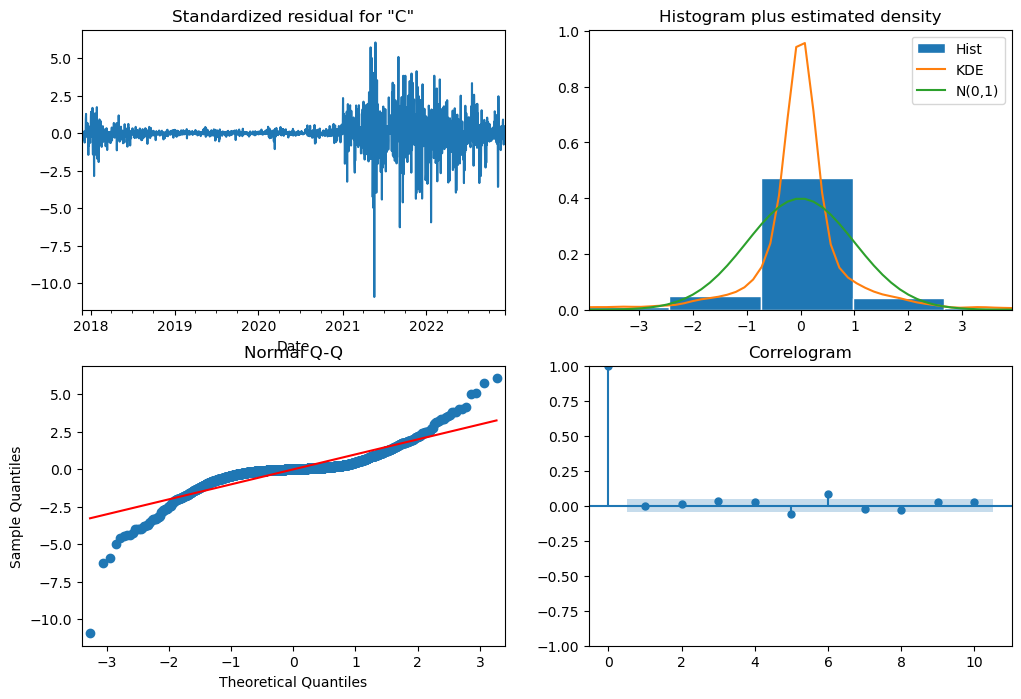

In [3]:
# SARIMA Modell erstellen
model = SARIMAX(df['Close'], order=(0,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Modell auswerten
results.summary()

# Modell plotten
results.plot_diagnostics(figsize=(12,8))
plt.show()



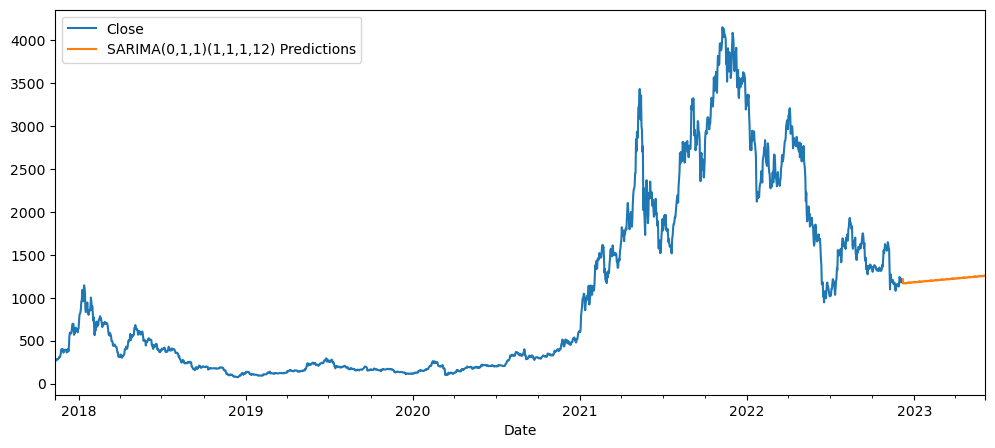

In [4]:
# Vorhersage erstellen
start = len(df_diff)
end = len(df_diff) + 180
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(0,1,1)(1,1,1,12) Predictions')

# Vorhersage plotten
df['Close'].plot(figsize=(12,5), legend=True)
predictions.plot(legend=True)
plt.show()

